# fit tempo rilassamento

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [2]:
def load_data_from_file(file_path):
    
    data = np.loadtxt(file_path, delimiter=',', skiprows=9)  # Presuppone un file txt con intestazione
    x = data[:, 0]
    y = data[:, 1]
    return x, y

In [3]:
file_path = "data/GruppoA_TimeRelaxation_20250325_152417_Traces.csv"
xT, yV = load_data_from_file(file_path)

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_9877/361909744.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


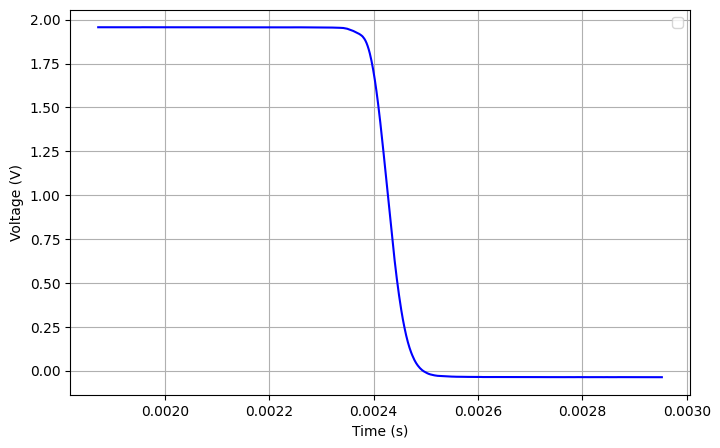

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(xT, yV, marker='', linestyle='-', color='b')
plt.title('')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)

In [5]:
def sigmoid(x, A, x0, tau, C):
    return A / (1 + np.exp(-(x - x0) / tau)) + C

In [6]:
popt, pcov = curve_fit(sigmoid, xT, yV, absolute_sigma=True, p0=[1, 0, 1, 0])

# Calcolo gli errori sui parametri dalla matrice di covarianza
errors = np.sqrt(np.diag(pcov))

In [10]:
A_fit, x0_fit, tau_fit, C_fit = popt
A_err, x0_err, tau_err, C_err = errors

print(f"A = {A_fit:.4f} ± {A_err:.4f}")
print(f"x0 = {x0_fit:.4f} ± {x0_err:.4f}")
print(f"tau = {tau_fit:.7f} ± {tau_err:.7f}")
print(f"C = {C_fit:.4f} ± {C_err:.4f}")

A = -1.9938 ± 0.0670
x0 = 0.0024 ± 0.0000
tau = 0.0000159 ± 0.0000046
C = 1.9584 ± 0.0460


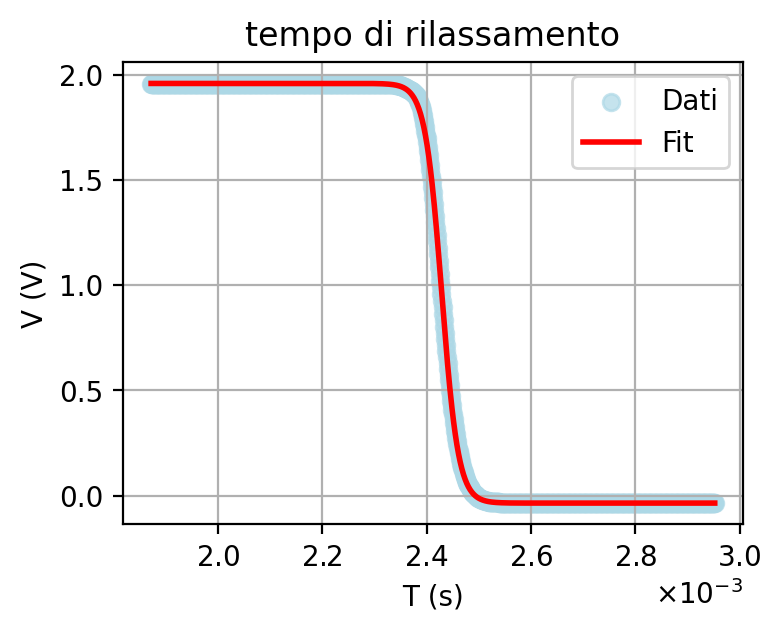

In [18]:
plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(xT, yV, label="Dati", color="lightblue", alpha=0.7)
plt.plot(xT, sigmoid(xT, *popt), color='r', label="Fit", linewidth=2)
plt.title("tempo di rilassamento")
plt.xlabel("T (s)")
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0), useMathText=True)
plt.ylabel("V (V)")
plt.legend()
plt.grid(True)
plt.show()